# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [24]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [26]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [27]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [29]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [33]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [35]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [36]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [37]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [38]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [39]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Usually RMSprop is recommended for RNN model

### Fitting the RNN to the Training set

In [40]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 125ms/step - loss: 0.0414
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0044
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [41]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [43]:
print(predicted_stock_price)

[[770.2283 ]
 [767.6074 ]
 [767.3344 ]
 [768.29474]
 [771.26556]
 [776.75745]
 [782.22296]
 [785.03876]
 [785.8331 ]
 [785.5926 ]
 [785.04407]
 [784.46027]
 [784.0734 ]
 [784.44934]
 [785.3731 ]
 [789.52716]
 [796.013  ]
 [803.3277 ]
 [807.86914]
 [805.0391 ]]


### Visualising the results

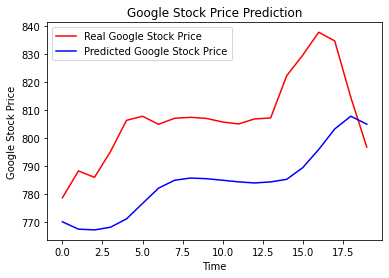

In [44]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [45]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

25.920552043160786
